In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
# Others
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
init_notebook_mode(connected=True)

In [2]:
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
items = pd.read_csv("data/olist_order_items_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
translations = pd.read_csv("data/product_category_name_translation.csv")

On observe les jeux de données avant de les merges

#### Payments

In [3]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Orders

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
orders.drop(columns=["order_approved_at", "order_delivered_carrier_date",
                     "order_delivered_customer_date","order_estimated_delivery_date"], inplace=True)

In [6]:
orders["order_purchase_timestamp"] = orders["order_purchase_timestamp"].apply(pd.to_datetime, errors='coerce')

#### Reviews

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
reviews.drop(columns=["review_comment_title", "review_comment_message", "review_creation_date", 
                      "review_answer_timestamp"], inplace=True)

#### Geolocation

In [9]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Customers

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers.drop(columns=["customer_zip_code_prefix"], inplace=True)

#### Items

In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
items.drop(columns=["shipping_limit_date"], inplace=True)

#### Products

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [16]:
products.drop(columns=["product_length_cm", "product_height_cm", "product_width_cm", 
                       "product_name_lenght", "product_description_lenght"], inplace=True)

In [17]:
null_products_indexes = products[products["product_category_name"].isnull()].index
products.drop(index=null_products_indexes, inplace=True)

In [18]:
products.isnull().sum()

product_id               0
product_category_name    0
product_photos_qty       0
product_weight_g         1
dtype: int64

In [19]:
add_missing_products_indexes = products[products['product_weight_g'].isnull()].index
products.drop(index=add_missing_products_indexes, inplace=True)

#### Sellers

In [20]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [21]:
sellers.drop(columns=["seller_zip_code_prefix"], inplace=True)

#### Translation

In [22]:
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Merge des sous datasets

In [23]:
df = orders.copy()
df = df.merge(payments, on="order_id")
df = df.merge(reviews, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(sellers, on="seller_id")
df = df.merge(translations, on="product_category_name")
df["product_category_name"] = df["product_category_name_english"]
df.drop(columns=["product_category_name_english"], inplace=True)

In [24]:
df.shape

(116580, 23)

### Premier tri fonctionnel
#### Gestion des doublons

In [25]:
df.duplicated().sum()

0

#### Gestion des valeurs manquantes

In [26]:
df.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
review_id                   0
review_score                0
customer_unique_id          0
customer_city               0
customer_state              0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category_name       0
product_photos_qty          0
product_weight_g            0
seller_city                 0
seller_state                0
dtype: int64

#### Gestion des types

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116580 entries, 0 to 116579
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  116580 non-null  object        
 1   customer_id               116580 non-null  object        
 2   order_status              116580 non-null  object        
 3   order_purchase_timestamp  116580 non-null  datetime64[ns]
 4   payment_sequential        116580 non-null  int64         
 5   payment_type              116580 non-null  object        
 6   payment_installments      116580 non-null  int64         
 7   payment_value             116580 non-null  float64       
 8   review_id                 116580 non-null  object        
 9   review_score              116580 non-null  int64         
 10  customer_unique_id        116580 non-null  object        
 11  customer_city             116580 non-null  object        
 12  cu

In [28]:
df["product_photos_qty"] = df["product_photos_qty"].astype("int64")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116580 entries, 0 to 116579
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  116580 non-null  object        
 1   customer_id               116580 non-null  object        
 2   order_status              116580 non-null  object        
 3   order_purchase_timestamp  116580 non-null  datetime64[ns]
 4   payment_sequential        116580 non-null  int64         
 5   payment_type              116580 non-null  object        
 6   payment_installments      116580 non-null  int64         
 7   payment_value             116580 non-null  float64       
 8   review_id                 116580 non-null  object        
 9   review_score              116580 non-null  int64         
 10  customer_unique_id        116580 non-null  object        
 11  customer_city             116580 non-null  object        
 12  cu

### Analyse exploratoire

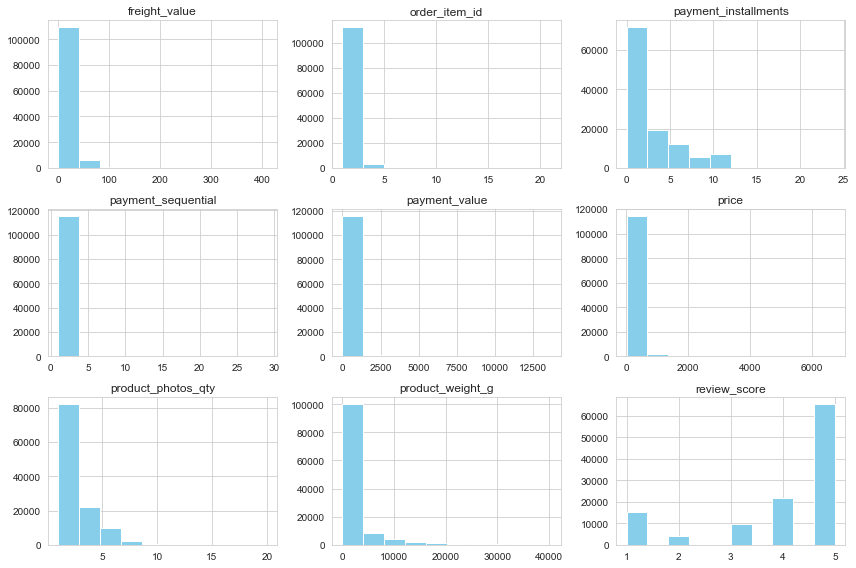

In [30]:
df.loc[:, (df.dtypes != object)].hist(figsize=(12, 8), color="skyblue")
plt.tight_layout()
plt.show()

In [31]:
def plot_dist(values, log_values, title):
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))
    axis[0].set_title("{} - Linear scale".format(title))
    axis[1].set_title("{} - Logn scale".format(title))
    ax1 = sns.distplot(values, color="skyblue", ax=axis[0])
    ax2 = sns.distplot(log_values, color="skyblue", ax=axis[1])

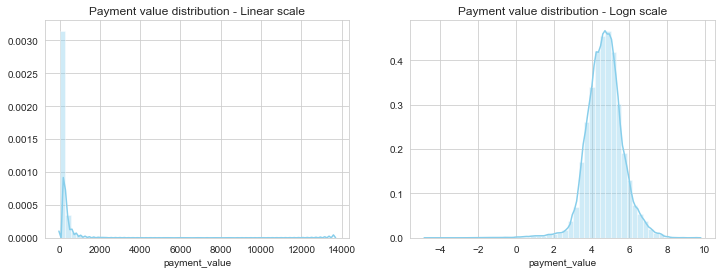

In [32]:
log_value = df["payment_value"].apply(lambda x: np.log(x) if x > 0 else 0)
plot_dist(df["payment_value"], log_value, "Payment value distribution")

Méthode de paiement

Il y a 4 méthodes de paiements : Carte de crédit, carte de débit, boleto (bordereau bancaire) et bon de réduction (voucher)

In [33]:
method_count = df['payment_type'].value_counts().to_frame().reset_index()
method_value = df.groupby('payment_type')['payment_value'].sum().to_frame().reset_index()
# Plotly piechart
colors = None
trace1 = go.Pie(labels=method_count['index'], values=method_count['payment_type'],
                domain= {'x': [0, .48]}, marker=dict(colors=colors))
trace2 = go.Pie(labels=method_value['payment_type'], values=method_value['payment_value'],
                domain= {'x': [0.52, 1]}, marker=dict(colors=colors))
layout = dict(title= "Nombre de paiements (gauche) et Valeur totale des paiements (droite)", 
              height=400, width=800,)
fig = dict(data=[trace1, trace2], layout=layout)
iplot(fig)

La plupart des paiements sont effectués avec une carte de crédit (presque 75%) et avec boleto (presque 20%)

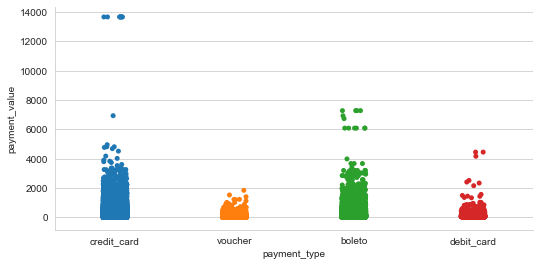

In [34]:
ax = sns.catplot(x="payment_type", y="payment_value", data=df, aspect=2, height=3.8)

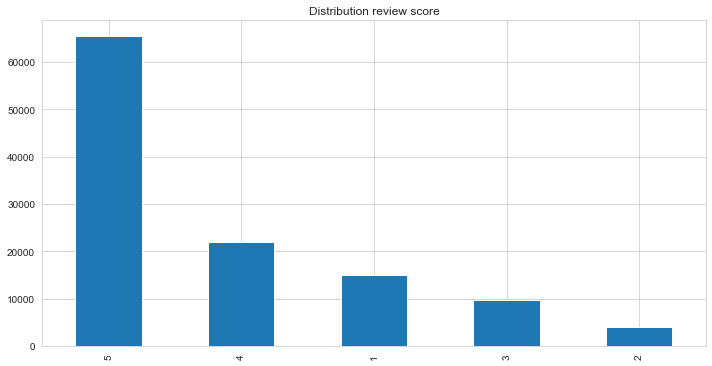

In [35]:
plt.figure(figsize=(10, 5))
df['review_score'].value_counts().plot(kind="bar")
plt.tight_layout()
plt.title("Distribution review score")
plt.show()

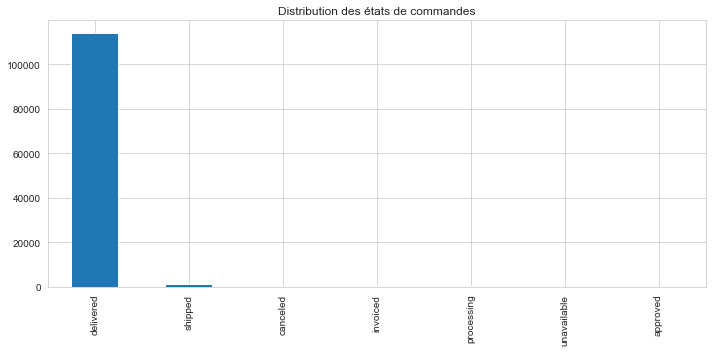

In [36]:
plt.figure(figsize=(10, 5))
plt.title("Distribution des états de commandes")
df["order_status"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

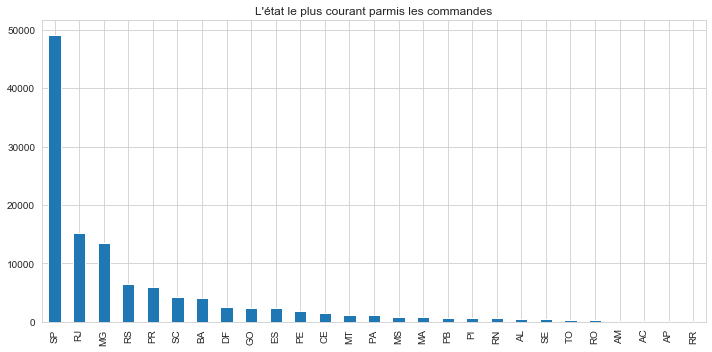

In [37]:
plt.figure(figsize=(10, 5))
plt.title("L'état le plus courant parmis les commandes")
df["customer_state"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

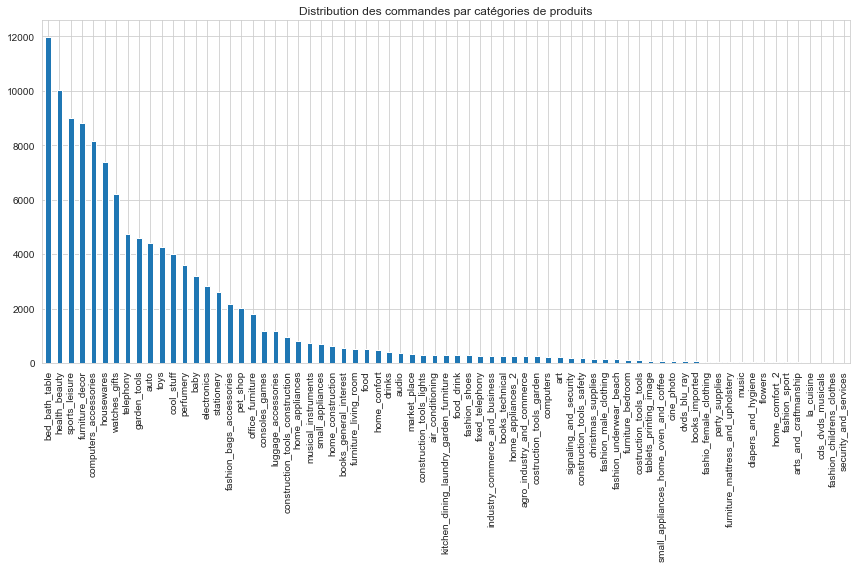

In [38]:
plt.figure(figsize=(12, 8))
plt.title("Distribution des commandes par catégories de produits")
df["product_category_name"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

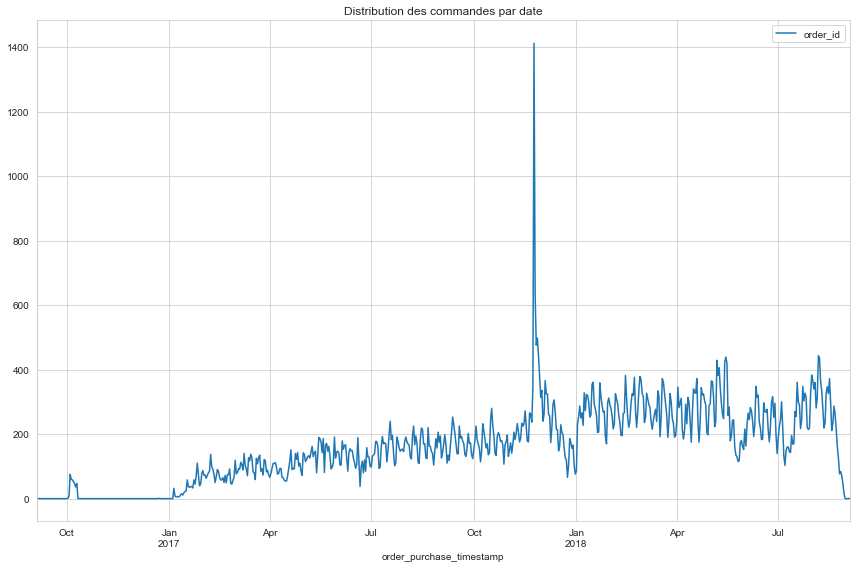

In [39]:
counts = df.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq="D")).count()
fig = plt.figure(figsize=(12, 8))
plt.title("Distribution des commandes par date")
ax = fig.gca()
counts.plot(y="order_id", ax=ax)
plt.tight_layout()
plt.show()

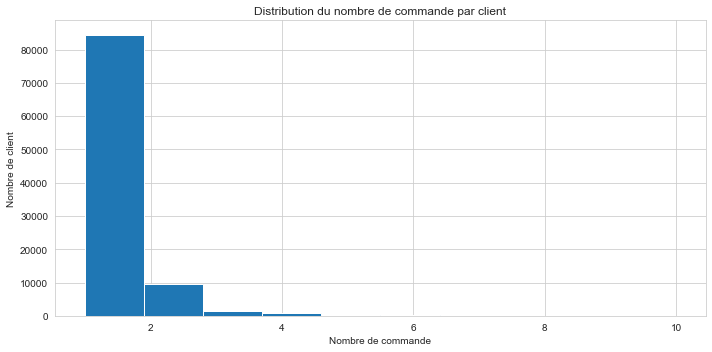

In [40]:
plt.figure(figsize=(10, 5))
plt.title("Distribution du nombre de commande par client")
plt.xlabel("Nombre de commande")
plt.ylabel("Nombre de client")
df["customer_id"].value_counts()[df["customer_id"].value_counts() <= 10].hist(bins=10)
plt.tight_layout()
plt.show()

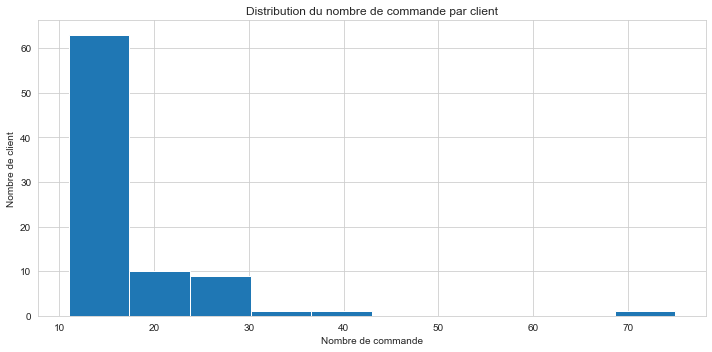

In [41]:
plt.figure(figsize=(10, 5))
plt.title("Distribution du nombre de commande par client")
plt.xlabel("Nombre de commande")
plt.ylabel("Nombre de client")
df["customer_unique_id"].value_counts()[df["customer_unique_id"].value_counts() > 10].hist(bins=10)
plt.tight_layout()
plt.show()

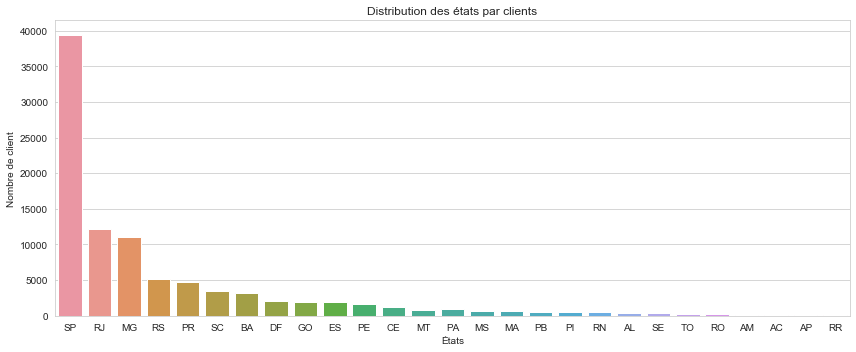

In [42]:
customer_state_count_df = df.groupby(['customer_unique_id', 'customer_state']).count().reset_index()

plt.figure(figsize=(12, 5))
sns.countplot(customer_state_count_df.customer_state, order=df.customer_state.value_counts().index)
plt.title("Distribution des états par clients")
plt.ylabel("Nombre de client")
plt.xlabel("États")
plt.tight_layout()
plt.show()

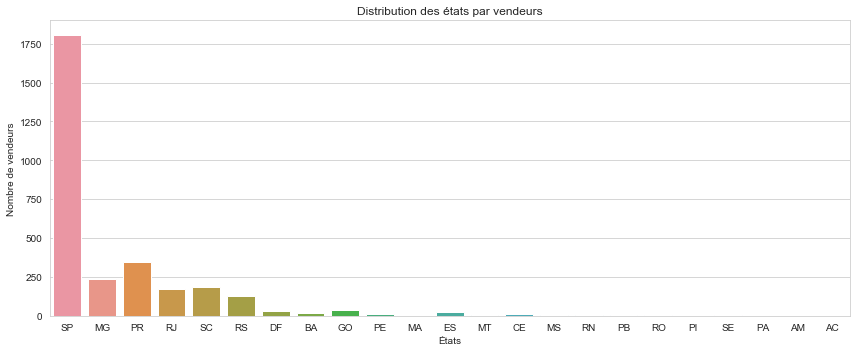

In [43]:
seller_state_count_df = df.groupby(['seller_id', 'seller_state']).count().reset_index()

plt.figure(figsize=(12, 5))
sns.countplot(seller_state_count_df.seller_state, order=df.seller_state.value_counts().index)
plt.title("Distribution des états par vendeurs")
plt.ylabel("Nombre de vendeurs")
plt.xlabel("États")
plt.tight_layout()
plt.show()

### Analyse multi-variée

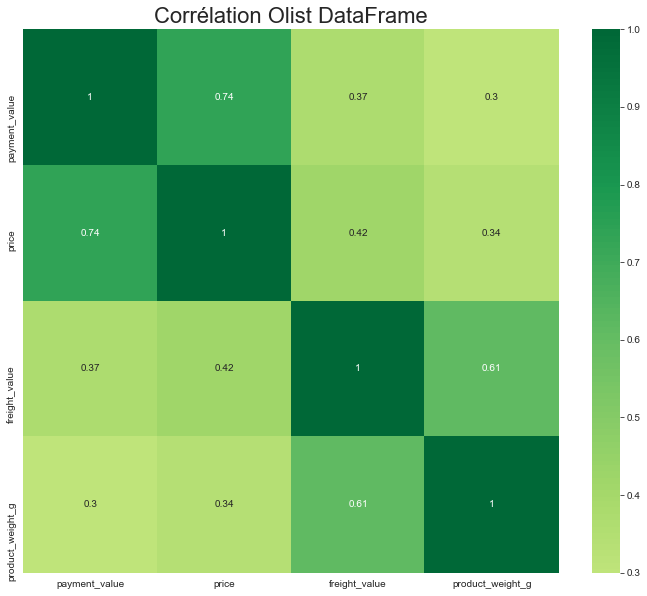

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.loc[:, (df.dtypes == float)].corr().round(2), xticklabels=df.loc[:, (df.dtypes == float)].corr().columns, yticklabels=df.loc[:, (df.dtypes == float)].corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title("Corrélation Olist DataFrame", fontsize=22)
plt.show()

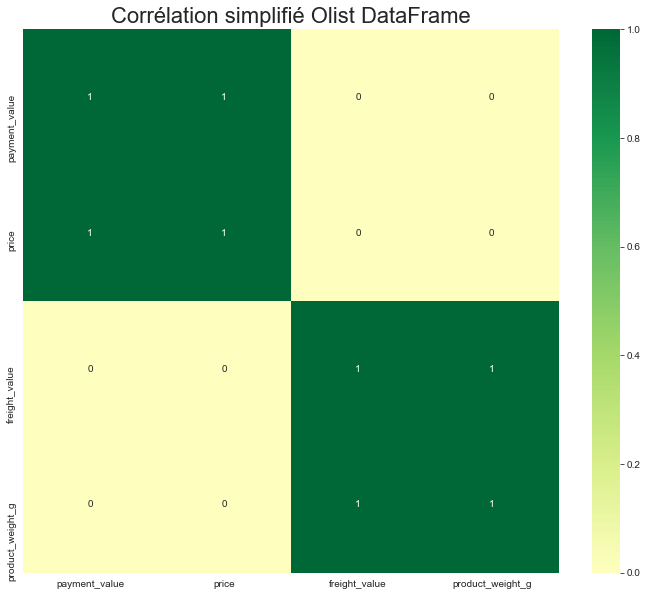

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(abs(df.loc[:, (df.dtypes == float)].corr().round(2)) > 0.5, xticklabels=df.loc[:, (df.dtypes == float)].corr().columns, yticklabels=df.loc[:, (df.dtypes == float)].corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title("Corrélation simplifié Olist DataFrame", fontsize=22)
plt.show()

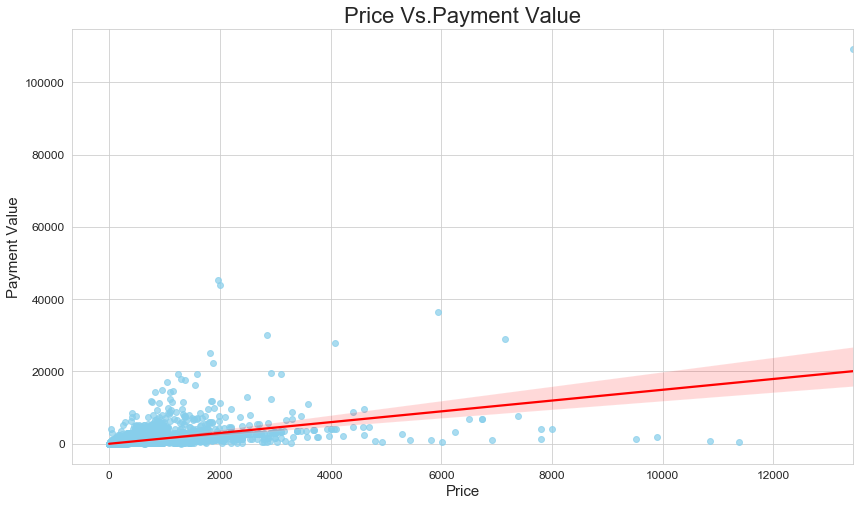

In [46]:
plt.figure(figsize=(14,8))

price_reg = df.groupby('customer_unique_id').sum()[['price', 'payment_value']].reset_index()['price']
product_value_reg = df.groupby('customer_unique_id').sum()[['price', 'payment_value']].reset_index()['payment_value']
sns.regplot(x=price_reg, y=product_value_reg, scatter_kws={'alpha': 0.7, 'color': 'skyblue'}, line_kws={"color": "red"})

plt.title('Price Vs.Payment Value'.title(), fontsize=22)
plt.xlabel('Price'.title(), fontsize=15)
plt.ylabel('Payment Value'.title(), fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

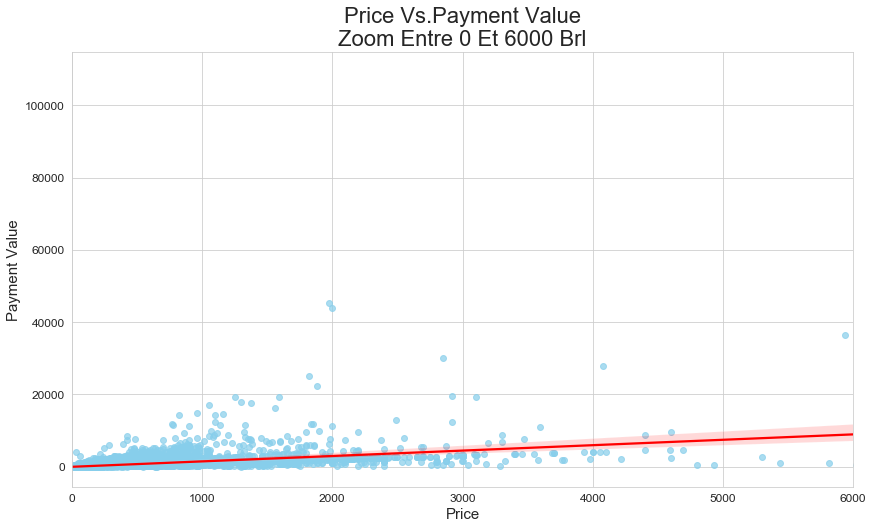

In [47]:
plt.figure(figsize=(14,8))

price_reg = df.groupby('customer_unique_id').sum()[['price', 'payment_value']].reset_index()['price']
product_value_reg = df.groupby('customer_unique_id').sum()[['price', 'payment_value']].reset_index()['payment_value']
sns.regplot(x=price_reg, y=product_value_reg, scatter_kws={'alpha': 0.7, 'color': 'skyblue'}, line_kws={"color": "red"})

plt.xlim(0, 6000)
plt.title('Price Vs.Payment Value'+'\n'+'Zoom entre 0 et 6000 BRL'.title(), fontsize=22)
plt.xlabel('Price'.title(), fontsize=15)
plt.ylabel('Payment Value'.title(), fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

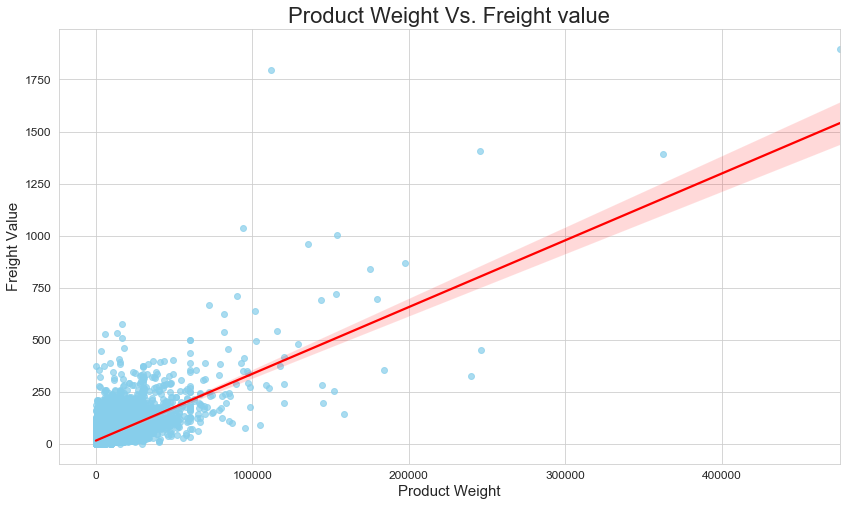

In [48]:
plt.figure(figsize=(14,8))

product_weight_g_reg = df.groupby('customer_unique_id').sum()[['product_weight_g', 'freight_value']].reset_index()['product_weight_g']
freight_value_reg = df.groupby('customer_unique_id').sum()[['product_weight_g', 'freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha': 0.7, 'color': 'skyblue'}, line_kws={"color": "red"})

plt.title('Product Weight Vs. Freight value', fontsize=22)
plt.xlabel('Product Weight'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

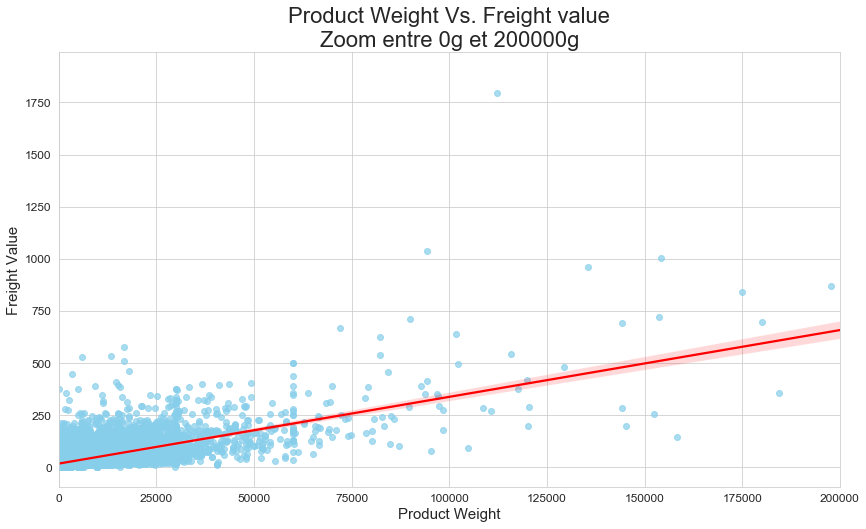

In [49]:
plt.figure(figsize=(14,8))

product_weight_g_reg = df.groupby('customer_unique_id').sum()[['product_weight_g', 'freight_value']].reset_index()['product_weight_g']
freight_value_reg = df.groupby('customer_unique_id').sum()[['product_weight_g', 'freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha': 0.7, 'color': 'skyblue'}, line_kws={"color": "red"})

plt.xlim(0, 200000)
plt.title('Product Weight Vs. Freight value'+ '\n' + 'Zoom entre 0g et 200000g', fontsize=22)
plt.xlabel('Product Weight'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

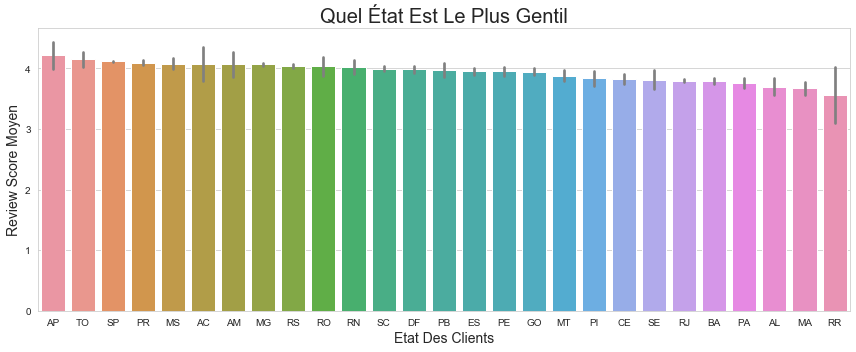

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='customer_state', y='review_score', order = df.groupby('customer_state').mean().reset_index().sort_values('review_score', ascending=False)['customer_state'].values, errcolor = 'grey');


plt.title('Quel état est le plus gentil'.title(), fontsize=20);
plt.ylabel('Review Score Moyen'.title(), fontsize=14);
plt.xlabel('Etat des clients'.title(), fontsize=14);

plt.tight_layout()
plt.show()

#### Suppression de caractéristique non pertinentes

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116580 entries, 0 to 116579
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  116580 non-null  object        
 1   customer_id               116580 non-null  object        
 2   order_status              116580 non-null  object        
 3   order_purchase_timestamp  116580 non-null  datetime64[ns]
 4   payment_sequential        116580 non-null  int64         
 5   payment_type              116580 non-null  object        
 6   payment_installments      116580 non-null  int64         
 7   payment_value             116580 non-null  float64       
 8   review_id                 116580 non-null  object        
 9   review_score              116580 non-null  int64         
 10  customer_unique_id        116580 non-null  object        
 11  customer_city             116580 non-null  object        
 12  cu

In [52]:
df.drop(columns=["order_status", "customer_city", "product_photos_qty", "seller_id", "seller_state", 
                 "seller_city", "price", "freight_value", "customer_id", "review_id", "order_item_id",
                "product_id", "product_photos_qty", "product_weight_g"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116580 entries, 0 to 116579
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  116580 non-null  object        
 1   order_purchase_timestamp  116580 non-null  datetime64[ns]
 2   payment_sequential        116580 non-null  int64         
 3   payment_type              116580 non-null  object        
 4   payment_installments      116580 non-null  int64         
 5   payment_value             116580 non-null  float64       
 6   review_score              116580 non-null  int64         
 7   customer_unique_id        116580 non-null  object        
 8   customer_state            116580 non-null  object        
 9   product_category_name     116580 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.8+ MB


#### Enregistrement du jeux de donnée en plusieurs sous-set par date

In [60]:
data_3_months = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01") & (df["order_purchase_timestamp"] <= "2017-03-31")].reset_index(drop=True)
data_6_months = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01") & (df["order_purchase_timestamp"] <= "2017-06-30")].reset_index(drop=True)
data_9_months = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01") & (df["order_purchase_timestamp"] <= "2017-09-30")].reset_index(drop=True)
data_12_months = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01") & (df["order_purchase_timestamp"] <= "2017-12-31")].reset_index(drop=True)
data_15_months = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01") & (df["order_purchase_timestamp"] <= "2018-03-31")].reset_index(drop=True)
data_18_months = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01") & (df["order_purchase_timestamp"] <= "2018-06-30")].reset_index(drop=True)
data_all = df.loc[(df["order_purchase_timestamp"] >= "2017-01-01")].reset_index(drop=True)

In [61]:
data_3_months.to_csv("data/clean/data_3_months.csv", index=False)
data_6_months.to_csv("data/clean/data_6_months.csv", index=False)
data_9_months.to_csv("data/clean/data_9_months.csv", index=False)
data_12_months.to_csv("data/clean/data_12_months.csv", index=False)
data_15_months.to_csv("data/clean/data_15_months.csv", index=False)
data_18_months.to_csv("data/clean/data_18_months.csv", index=False)
data_all.to_csv("data/clean/data_all.csv", index=False)